In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("phase2.1_enhanced_fps_no_roles.csv")
df.head()

=== PHASE 4: Visualization & Insights Started ===
✅ Loaded 315 player records.


,player_name,Total_Matches,Total_Bt_Runs,Total_Bt_Balls,Total_Bw_Runs,Total_Bw_Balls,Total_4s,Total_6s,Total_Wkts,Batting_Points,Bowling_Points,Total_Fantasy_Points,FPS_per_Match,Match_Factor,Adjusted_FPS,Strike_Rate,SR_Bonus_Points,Economy_Rate,Econ_Bonus_Points,Enhanced_FPS
0,A Badoni,37,802,601,38,23,62,31,2,926,50,976,26.378378,1.0,26.378378,133.444260,2,9.913043,0,28.378378
1,A Kamboj,11,16,15,277,198,2,0,10,18,250,268,24.363636,1.0,24.363636,106.666667,0,8.393939,0,24.363636
2,A Manohar,13,184,164,0,0,9,11,0,215,0,215,16.538462,1.0,16.538462,112.195122,0,NaN,0,16.538462
3,A Mhatre,7,240,131,0,0,31,11,0,293,0,293,41.857143,0.7,29.300000,183.206107,6,NaN,0,35.300000
4,A Mishra,8,19,30,168,127,2,0,8,21,200,221,27.625000,0.8,22.100000,63.333333,-2,7.937008,0,20.100000


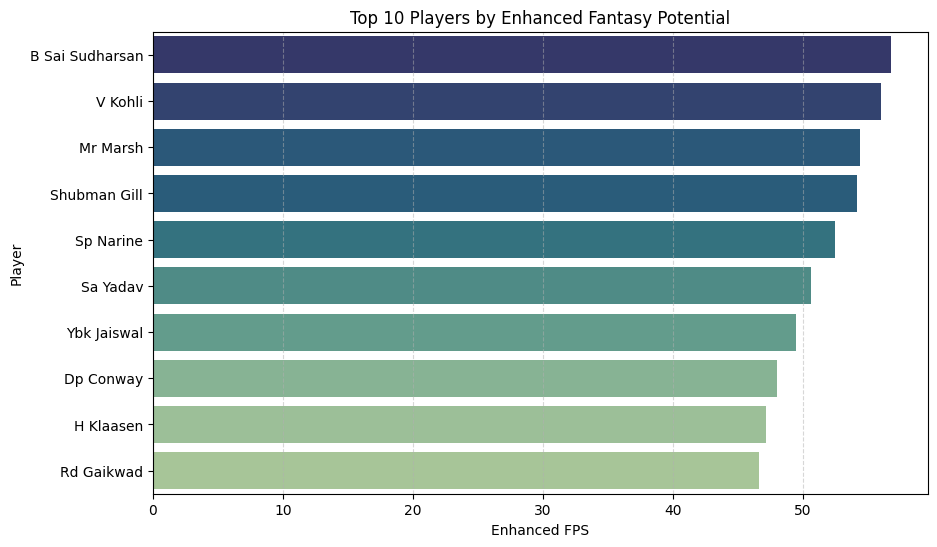

,player_name,Total_Matches,Enhanced_FPS,Strike_Rate,Economy_Rate
40,B Sai Sudharsan,35,56.771429,141.946598,NaN
291,V Kohli,44,56.000000,141.852368,NaN
168,Mr Marsh,26,54.423077,151.391466,8.258065
259,Shubman Gill,44,54.136364,149.847561,NaN
267,Sp Narine,40,52.450000,157.291667,7.180110
246,Sa Yadav,43,50.627907,168.724696,NaN
310,Ybk Jaiswal,43,49.488372,155.076628,NaN
63,Dp Conway,21,48.000000,133.980583,NaN
73,H Klaasen,39,47.153846,166.548881,NaN
228,Rd Gaikwad,34,46.617647,141.067538,NaN


In [ ]:
top10 = df.sort_values("Enhanced_FPS", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y="player_name", x="Enhanced_FPS", data=top10, palette="crest", hue="Enhanced_FPS", legend=False)
plt.title("Top 10 Players by Enhanced Fantasy Potential")
plt.xlabel("Enhanced FPS")
plt.ylabel("Player")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

display(top10[["player_name", "Total_Matches", "Enhanced_FPS", "Strike_Rate", "Economy_Rate"]])


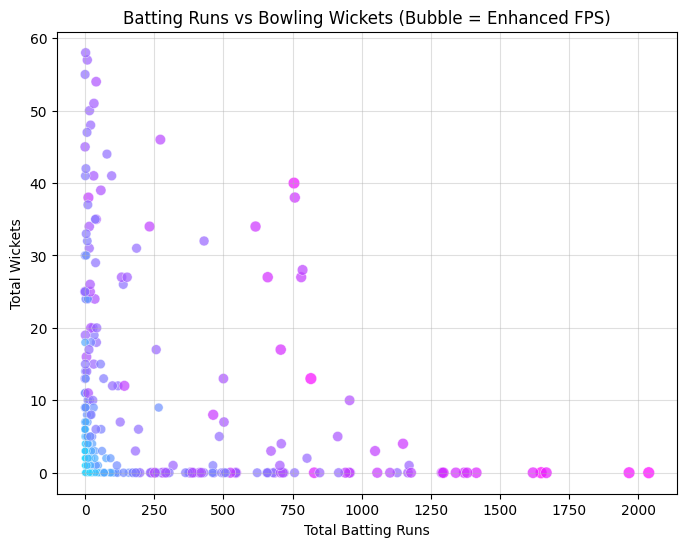

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Total_Bt_Runs", y="Total_Wkts",
                size="Enhanced_FPS", hue="Enhanced_FPS",
                palette="cool", alpha=0.7, legend=False)
plt.title("Batting Runs vs Bowling Wickets (Bubble = Enhanced FPS)")
plt.xlabel("Total Batting Runs")
plt.ylabel("Total Wickets")
plt.grid(alpha=0.4)
plt.show()

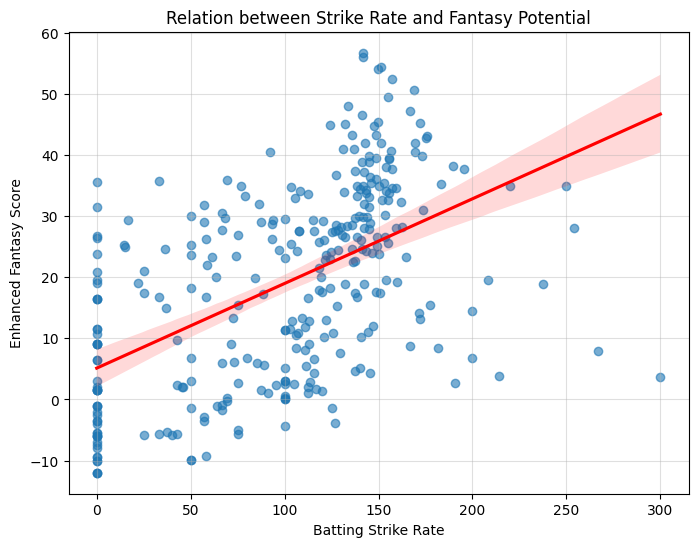

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Strike_Rate", y="Enhanced_FPS",
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Relation between Strike Rate and Fantasy Potential")
plt.xlabel("Batting Strike Rate")
plt.ylabel("Enhanced Fantasy Score")
plt.grid(alpha=0.4)
plt.show()

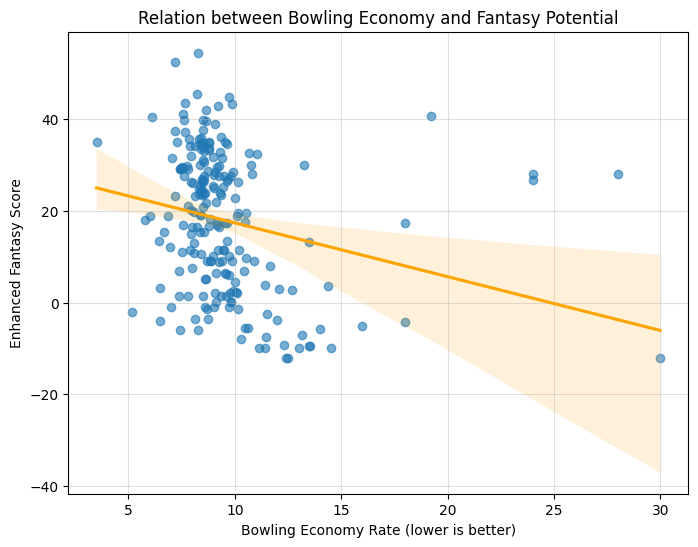

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df[df["Economy_Rate"]>0], x="Economy_Rate", y="Enhanced_FPS",
            scatter_kws={"alpha":0.6}, line_kws={"color":"orange"})
plt.title("Relation between Bowling Economy and Fantasy Potential")
plt.xlabel("Bowling Economy Rate (lower is better)")
plt.ylabel("Enhanced Fantasy Score")
plt.grid(alpha=0.4)
plt.show()

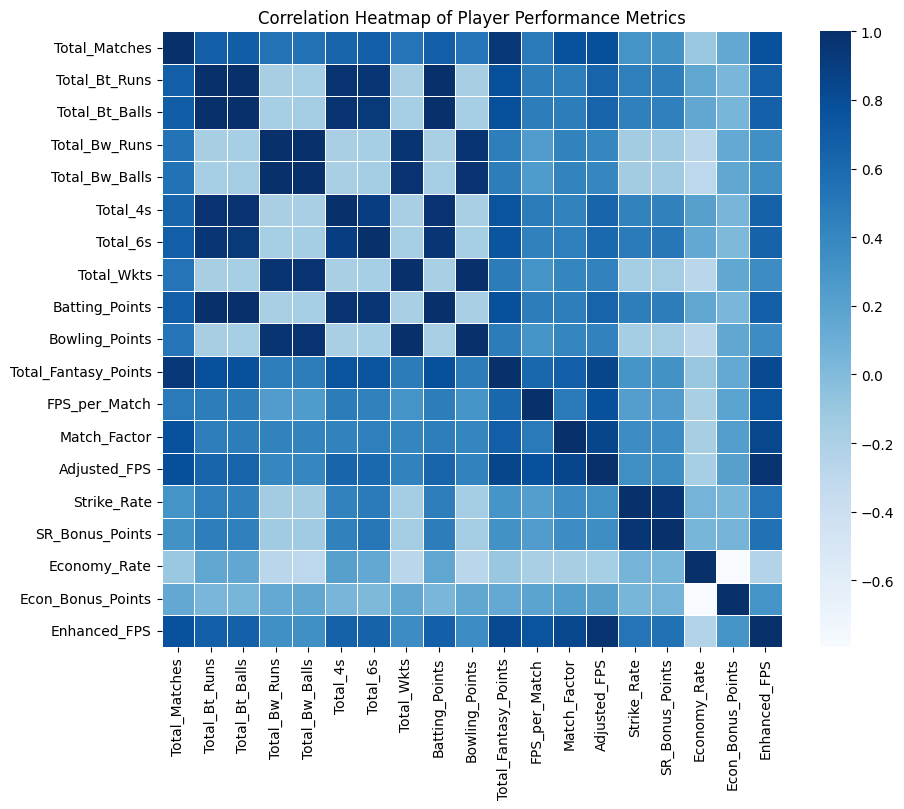

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="Blues", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Player Performance Metrics")
plt.show()

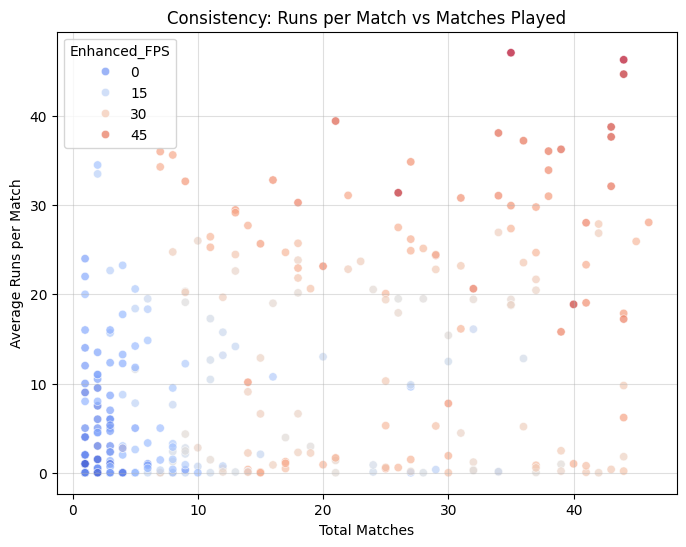

In [ ]:
df["Runs_per_match"] = df["Total_Bt_Runs"] / df["Total_Matches"].replace(0,np.nan)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Total_Matches", y="Runs_per_match",
                hue="Enhanced_FPS", palette="coolwarm", alpha=0.7)
plt.title("Consistency: Runs per Match vs Matches Played")
plt.xlabel("Total Matches")
plt.ylabel("Average Runs per Match")
plt.grid(alpha=0.4)
plt.show()

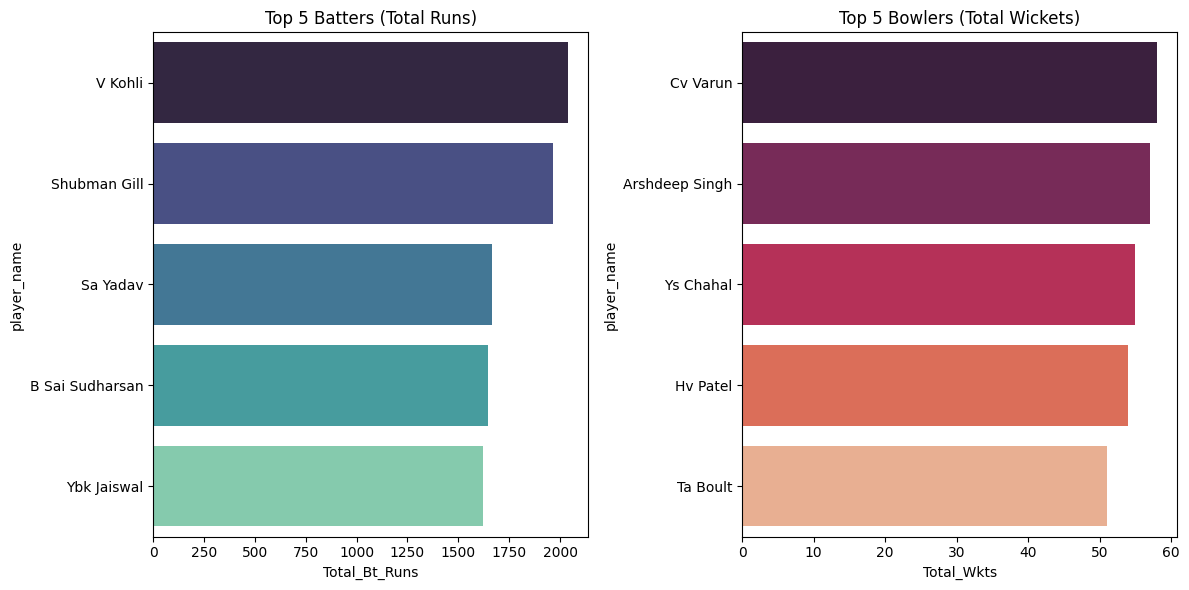

In [ ]:
top_batters = df.sort_values("Total_Bt_Runs", ascending=False).head(5)
top_bowlers = df.sort_values("Total_Wkts", ascending=False).head(5)

fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(ax=axes[0], data=top_batters, x="Total_Bt_Runs", y="player_name", palette="mako", hue="player_name", legend=False)
axes[0].set_title("Top 5 Batters (Total Runs)")
sns.barplot(ax=axes[1], data=top_bowlers, x="Total_Wkts", y="player_name", palette="rocket", hue="player_name", legend=False)
axes[1].set_title("Top 5 Bowlers (Total Wickets)")
plt.tight_layout()
plt.show()